# Episode 05: Scoping of Proofs of concepts

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

In [ ]:
# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [1]:
from episode04 import clues2x2, solution2x2, clues5x5s, solution5x5s
from episode04 import Puzzle, BoardMark, SolvedNonoGameEngine

import numpy as np

In [166]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [167]:
solution2x2

array([[1, 0],
       [1, 1]])

# 3. Brute Force

The idea behind brute force is to generate all possible options and then check which one is vaid.

Unlike try-and-error the validation will take place on the whole board. We do not need to know the solution beforehand. The engine can compute the clues from the board and check whether the board holds or breaks the clues.

## 3.1. Experiment on 2x2

The first step is listing all possible options for the oard.

The board is a list of 0 and 1. From the clues we know the number of black cells. It is the sum of all clues.

All possible boards are permutations of this black cells over the cells of the board. If I have [1,0] all permutations are [1,0] and [0,1]

In [4]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

In [5]:
# create two generators, one for black cells and the other for fillers
from itertools import repeat, chain, tee
# 3 blacks
black_iterator = repeat(BoardMark.BLACK.value, puzzle2x2.required_blacks_count) 
# 1 filler
fillers_count = puzzle2x2.cells_count - puzzle2x2.required_blacks_count
filler_iterator = repeat(BoardMark.FILLER.value, fillers_count) 
# chain concatenate both iterators
# tee is used for debugging, it duplicates the iterator which otherwize could be consummed only once
initial_states_iterator, debug_iterator = tee(chain(black_iterator, filler_iterator))
# show the value for debugging
list(debug_iterator)

[1, 1, 1, 0]

In [6]:
# generate permutations 
from itertools import permutations
permutations_iterator, debug_iterator = tee(permutations(initial_states_iterator))
list(debug_iterator)
# there are 16 because permutation switch elements of the list and not values
# it does not take care that 1 occurs many times

[(1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1),
 (0, 1, 1, 1)]

In [7]:
# browse all boards and select valid ones
import numpy as np

# set avoids duplicates generated by permutations
for o in set(permutations_iterator):
    print(f"option:{o}")
    # select valid options - o is a tuple not a list
    errors = game2x2.submit(list(o), apply=False)
    if errors == 0:
        print(f"valid:{o}")
        game2x2.submit(list(o))

option:(1, 1, 0, 1)
option:(1, 1, 1, 0)
option:(0, 1, 1, 1)
option:(1, 0, 1, 1)
valid:(1, 0, 1, 1)


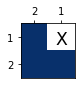

In [8]:
game2x2.show()

## 3.2. Experiment on 2x2 - Alternative implementation

Another way of analysing this problem is to compute all possible indexes of black cells instead of all possible boards.

Let's take an example. Say there is a jar with numbers from 0 to 3. These are possible positions of a cell in the board. I want to draw 3 numbers from the jar. This is named a combination of 3 out of 4.

In [9]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2)

In [10]:
# draw the position numbers from the pool of indexes
from itertools import combinations, tee
# want to get 3 positions in a range 0 - 4 where 4 is the number of cells
# we want each position to be unique thus no replacement
values = range(puzzle2x2.cells_count)
nb_drawn = puzzle2x2.required_blacks_count
temp_combinations_iterator = combinations(values, nb_drawn) 
combinations_iterator, debug_iterator = tee(temp_combinations_iterator)
list(debug_iterator)

[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]

In [11]:
# browse the options, buold the board and select valid boards
import numpy as np

for option in combinations_iterator:
    print(f"option:{option}")
    # compute the board state
    # put black at each position in combinations_iterator and fillers elsewhere
    states = np.full(puzzle2x2.cells_count, BoardMark.FILLER.value, dtype=int)
    # put black at each position in combinations_iterator and fillers elsewhere
    for pos in option:
        states.flat[pos] = BoardMark.BLACK.value
    
    # select valid options
    errors = game2x2.submit(list(o), apply=False)
    if errors == 0:
        print(f"valid:{states}")
        # batch update the board flattent to 1D
        game2x2.submit(list(o))

option:(0, 1, 2)
valid:[1 1 1 0]
option:(0, 1, 3)
valid:[1 1 0 1]
option:(0, 2, 3)
valid:[1 0 1 1]
option:(1, 2, 3)
valid:[0 1 1 1]


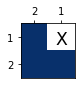

In [12]:
game2x2.show()

## 3.3. Wrap up

This exemple shows that the same heuristic or tool may be used in different ways depending on the way you put the problem.

What works:
- it is simple to design and implement
- no computation, no headache with split blocks

Limitation:
- number of options  increase rapidly with the size of the board. 

In addition all these options will have to be checked for validity. We used known solutions here  because they are available but in a real use case we would evaluate whether the option match the clues for each option.

The number of options increases at a lower rate in implementation 2 because the problem space is smaller. It is the number of blacks instead of the number of cells (blacks are usually around 50% of cells). However it increases rapidly.

In [185]:
from itertools import combinations

In [186]:
%time
from itertools import combinations
black_count = 4
cells_count = 9
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


126

In [187]:
%time
black_count = 7
cells_count = 16
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.72 µs


11440

In [188]:
%time
black_count = 14
cells_count = 25
combinations_iterator = combinations(range(cells_count), black_count)
len(list(combinations_iterator))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


4457400